# Import Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Read Data

In [3]:
df= pd.read_csv(r"C:\Users\MINE\Desktop\time series analysis\Time Series Analysis\Exponential Smoothing and Holt Winters\weekly_customer_complaints.csv")

In [4]:
df.head()

,week,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
0,1/1/2018,"1,750",37.26%,1,0,0
1,1/8/2018,"1,701",35.38%,0,0,0
2,1/15/2018,"1,711",36.22%,1,0,0
3,1/22/2018,"1,443",38.33%,1,0,0
4,1/29/2018,"1,397",36.34%,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   week                     261 non-null    object
 1   complaints               261 non-null    object
 2   discount_rate            261 non-null    object
 3   small_commercial_event   261 non-null    int64 
 4   medium_commercial_event  261 non-null    int64 
 5   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 12.4+ KB


In [6]:
df.set_index('week', inplace = True)

In [7]:
df.sample(5)

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
10/22/2018,"1,717",29.00%,0,0,0
12/16/2019,"2,614",28.47%,0,0,0
11/8/2021,"3,982",31.93%,0,0,1
11/7/2022,"4,164",30.20%,0,0,1
10/26/2020,"2,208",22.60%,0,0,0


# Preprocessing

In [8]:
# Remove comma and transform into float
df['complaints']=df['complaints'].str.replace(',', '').astype(int)

In [9]:
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
1/1/2018,1750,37.26%,1,0,0
1/8/2018,1701,35.38%,0,0,0
1/15/2018,1711,36.22%,1,0,0
1/22/2018,1443,38.33%,1,0,0
1/29/2018,1397,36.34%,0,0,0


In [10]:
df.index

Index(['1/1/2018', '1/8/2018', '1/15/2018', '1/22/2018', '1/29/2018',
       '2/5/2018', '2/12/2018', '2/19/2018', '2/26/2018', '3/5/2018',
       ...
       '10/24/2022', '10/31/2022', '11/7/2022', '11/14/2022', '11/21/2022',
       '11/28/2022', '12/5/2022', '12/12/2022', '12/19/2022', '12/26/2022'],
      dtype='object', name='week', length=261)

In [11]:
df.index =  pd.to_datetime(df.index)

In [12]:
# Setting frequency to w implies that the week starts on sunday
df= df.asfreq('W-Mon')

In [13]:
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750,37.26%,1,0,0
2018-01-08,1701,35.38%,0,0,0
2018-01-15,1711,36.22%,1,0,0
2018-01-22,1443,38.33%,1,0,0
2018-01-29,1397,36.34%,0,0,0


# EDA

[]

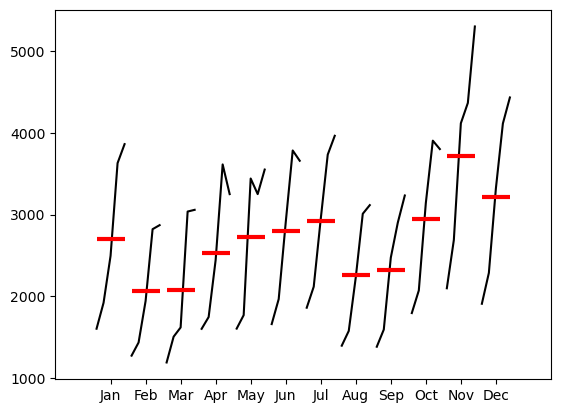

In [14]:
# Average customer complaints per month
month_plot(df.complaints.resample('ME').mean())  
plt.plot()

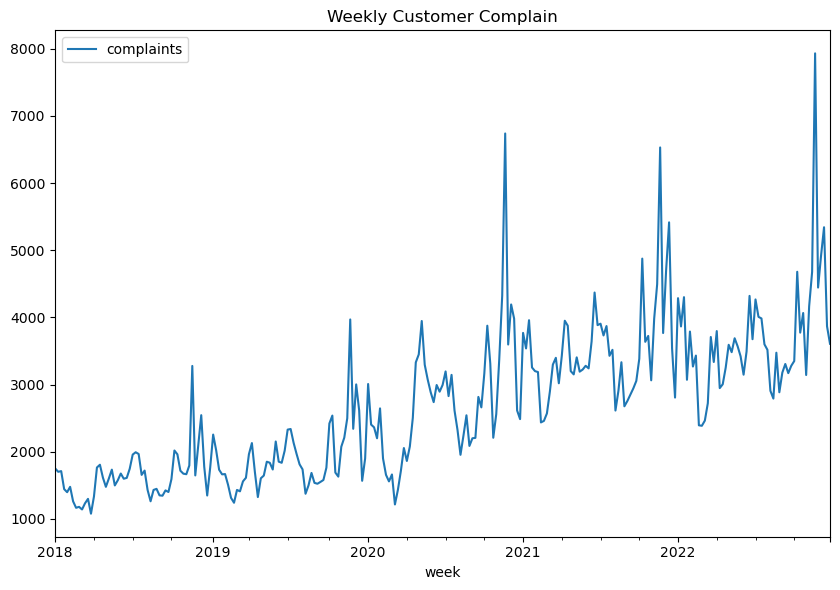

In [15]:
# Weekly customer complaints
fig, ax= plt.subplots(figsize= (8.5, 6))
ax= df['complaints'].plot(title= 'Weekly Customer Complain')
plt.tight_layout()
plt.legend()
plt.show()

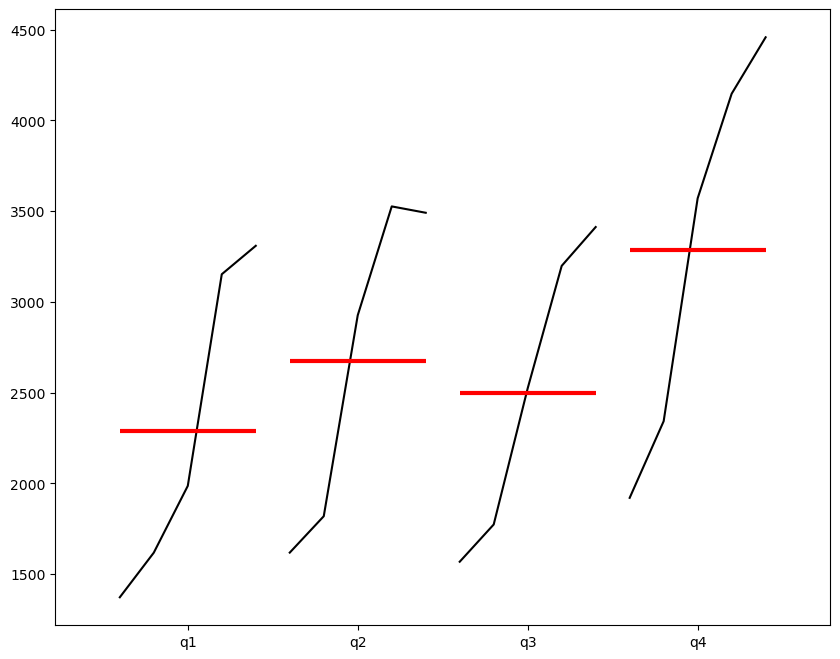

In [16]:
quarter_plot(df['complaints'].resample('QE').mean()).set_size_inches(10,8)
plt.show()

In [17]:
# Seasonal decoposition

decomposition = seasonal_decompose(df['complaints'], model='mul', period= 52)

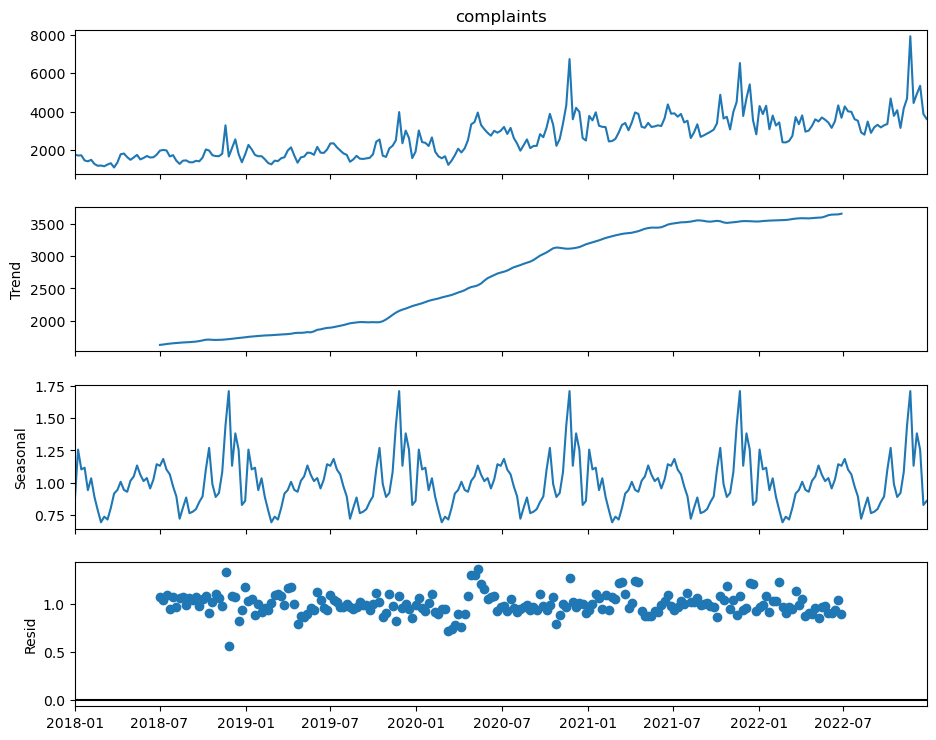

In [18]:
decomposition.plot().set_size_inches(10,8)
plt.show()

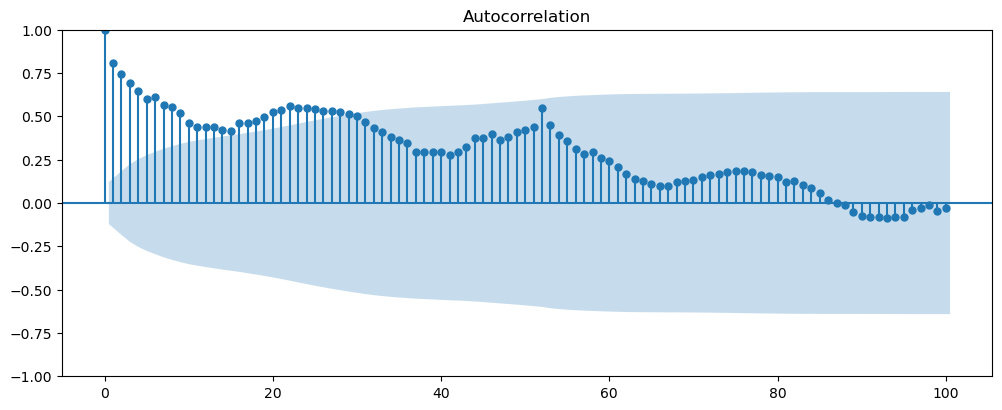

In [19]:

plot_acf(df['complaints'], lags= 100).set_size_inches(12,4.5)
plt.show()

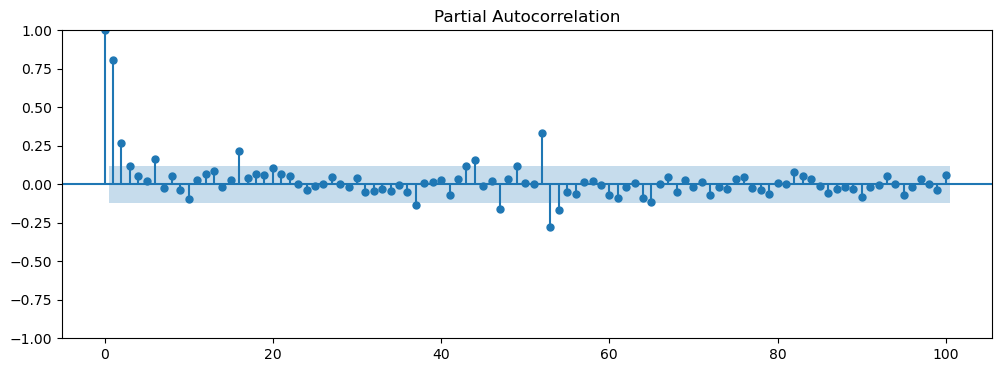

In [20]:
plot_pacf(df['complaints'], lags=100).set_size_inches(12,4)
plt.show()

# Train Test Split In Time Series Forcasting

In [21]:
# Goal is to predict the next quater(13 weeks)
train, test= df.iloc[:-13, 0], df.iloc[-13:, 0]

In [25]:
train.head()

week
2018-01-01    1750
2018-01-08    1701
2018-01-15    1711
2018-01-22    1443
2018-01-29    1397
Freq: W-MON, Name: complaints, dtype: int32

In [24]:
test.head()

week
2022-10-03    3350
2022-10-10    4679
2022-10-17    3773
2022-10-24    4065
2022-10-31    3142
Freq: W-MON, Name: complaints, dtype: int32

# Exponential Smoothing

In [30]:
# Simple Exponential Smoothing
model_simple= SimpleExpSmoothing(train).fit()

In [32]:
prediction_simple= model_simple.forecast(len(test))

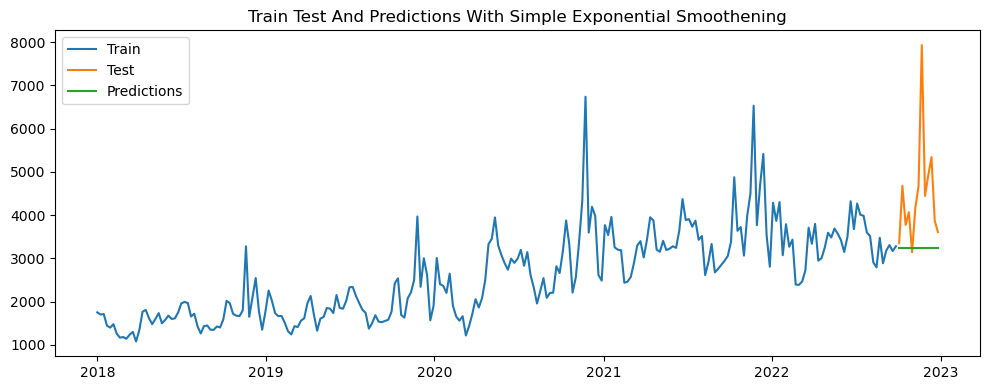

In [42]:
#  plot training, test and forcast
plt.figure(figsize=(10,4))
plt.plot(train, label= 'Train')
plt.plot(test, label= 'Test')
plt.plot(prediction_simple, label= 'Predictions')

plt.legend()
plt.title("Train Test And Predictions With Simple Exponential Smoothening")
plt.tight_layout()
plt.show()

# Double Exponential Smoothing

In [65]:
model_double =  ExponentialSmoothing(train,
                                     trend= 'mul', 
                                     seasonal= None).fit()

c:\ProgramData\new\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [66]:
pred_double=model_double.forecast(len(test))

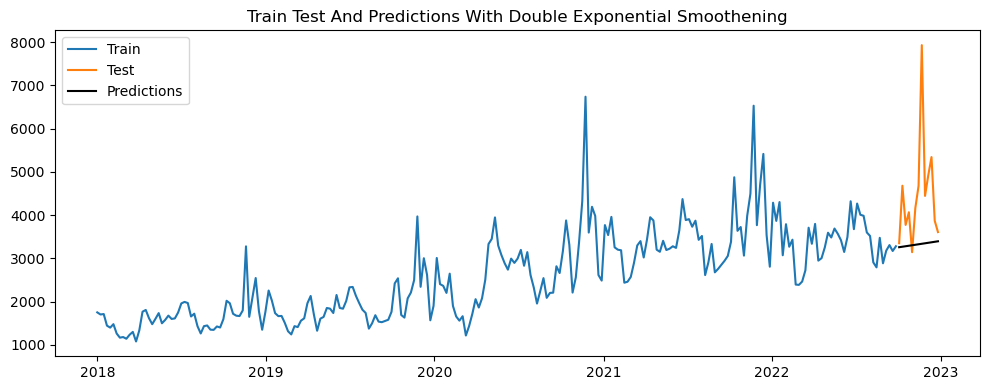

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train, label= 'Train')
plt.plot(test, label= 'Test')
plt.plot(pred_double, label= 'Predictions', color='black')

plt.legend()
plt.title("Train Test And Predictions With Double Exponential Smoothening")
plt.tight_layout()
plt.show()

# Thriple  Exponential Smoothing

In [71]:
model_triple =  ExponentialSmoothing(train,
                                     trend= 'mul', 
                                     seasonal= 'mul',
                                     seasonal_periods= 52).fit()

c:\ProgramData\new\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\ProgramData\new\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [72]:
pred_thri= model_triple.forecast(len(test))

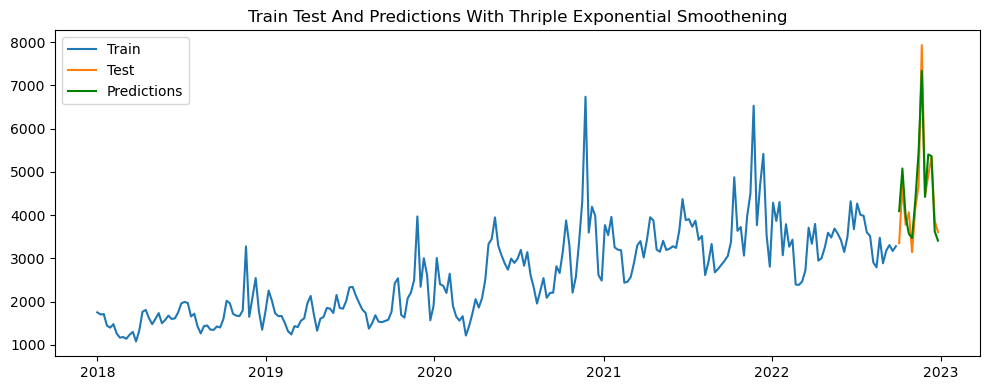

In [75]:
plt.figure(figsize=(10,4))
plt.plot(train, label= 'Train')
plt.plot(test, label= 'Test')
plt.plot(pred_thri, label= 'Predictions', color='green')

plt.legend()
plt.title("Train Test And Predictions With Thriple Exponential Smoothening")
plt.tight_layout()
plt.show()